# Pandas對時間序列的處理

** 此系列的文件為Udemy的python金融分析課程系列筆記(https://www.udemy.com/python-for-finance-and-trading-algorithms) **

** 金融分析的資料型態幾乎都是時間序列，本單元展示如何使用pandas套件處理時間序列 **


首先除了前幾單元介紹過的套件以外，需要再多import datetime這個套件

一些基本操作如下

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
date = datetime(2017,1,1,13,30,10)
date

datetime.datetime(2017, 1, 1, 13, 30, 10)

In [4]:
date.day

1

In [5]:
date.year

2017

簡單的做一個隨機的陣列，把它放入pd當中並以時間序列作為index

In [7]:
first_two = [datetime(2016, 1, 1), datetime(2016, 1, 2)]
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [8]:
dt_ind = pd.DatetimeIndex(first_two)
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [9]:
data = np.random.randn(2,2)
print(data)
cols = ['A','B']

[[ 0.21156393 -0.5621145 ]
 [ 0.8509373  -0.1076602 ]]


In [10]:
df = pd.DataFrame(data,dt_ind,cols)
df

,A,B
2016-01-01,0.211564,-0.562115
2016-01-02,0.850937,-0.107660


In [11]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [12]:
df.index.argmax()

1

Time resampling

這個功能可以對時間序列重新編排，例如將data以周或月做整合

首先先從檔案讀出需要處理的資料，並做一些初步的處理，將date欄位轉為時間並設定為index

In [13]:
df = pd.read_csv('time_data/walmart_stock.csv')

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [17]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Date',inplace=True)

In [18]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


接下來就可以用resample指令做資料的重整

詳細的相關參數可參考官方文件

http://pandas.pydata.org/pandas-docs/stable/timeseries.html

於其中的Offset Aliases部分有詳細的參數說明（B為上班日，W為以周排列等）

In [21]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9239015,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6951496,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6515612,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9040769,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9371645,68.054229


也可以導入自訂函數對group by過後的結果做處理

In [22]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of samplling rate.
    """
    return entry[0]

In [23]:
df.resample(rule='A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


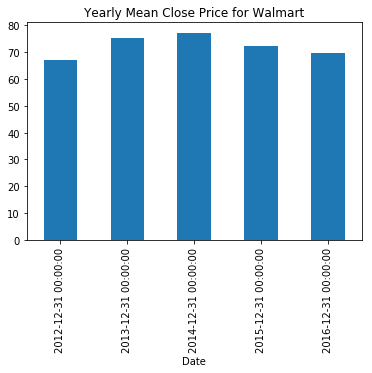

In [25]:
df['Close'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean Close Price for Walmart')
plt.show()

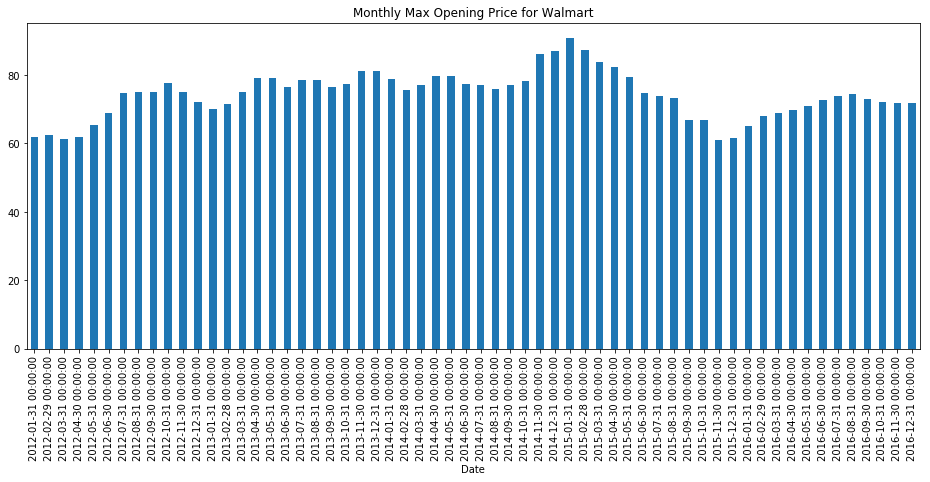

In [26]:
df['Open'].resample('M').max().plot(kind='bar',figsize=(16,6))
plt.title('Monthly Max Opening Price for Walmart')
plt.show()

接下來介紹shift這個指令

這個指令可以使資料平移數個工作天，或者是進階設定以月或是年做平移

In [27]:
df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

In [28]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [29]:
df.shift(1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [30]:
df.shift(1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,71.239998,71.239998,69.209999,69.589996,12106800.0,69.082042
2016-12-27,69.430000,69.750000,69.360001,69.540001,4803900.0,69.032411
2016-12-28,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-29,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-30,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456


In [31]:
df.shift(-1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109


In [32]:
df.tshift(periods=1,freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


rolling

這個功能可以對接近的數筆資料做平均，利用這個指令就能簡單地做出移動平均線

In [38]:
df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date',parse_dates=True)

In [39]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


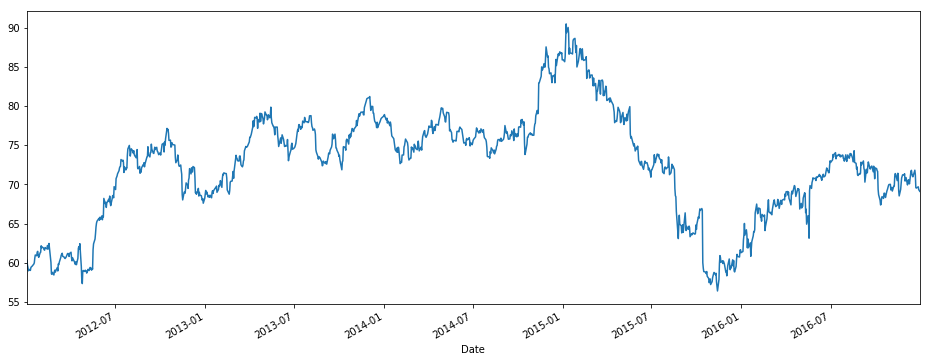

In [40]:
df['Close'].plot(figsize=(16,6))
plt.show()

In [41]:
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


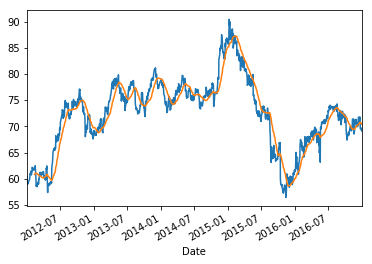

In [43]:
df['Close'].plot()
df.rolling(window=30).mean()['Close'].plot()
plt.show()

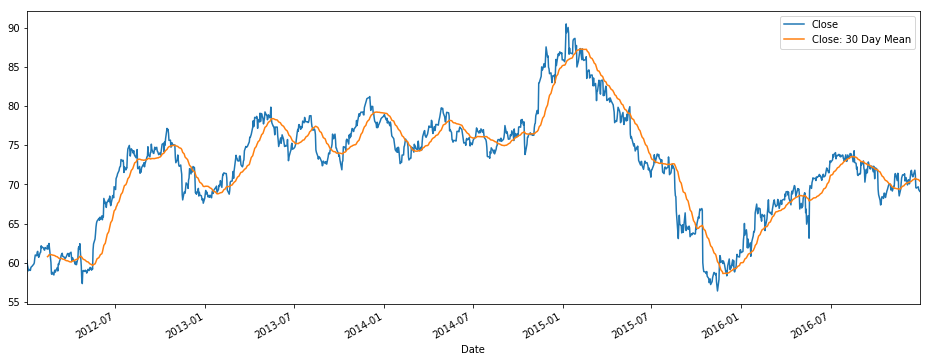

In [46]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.show()

expanding

這個指令會計算當天之前的所有數值平均

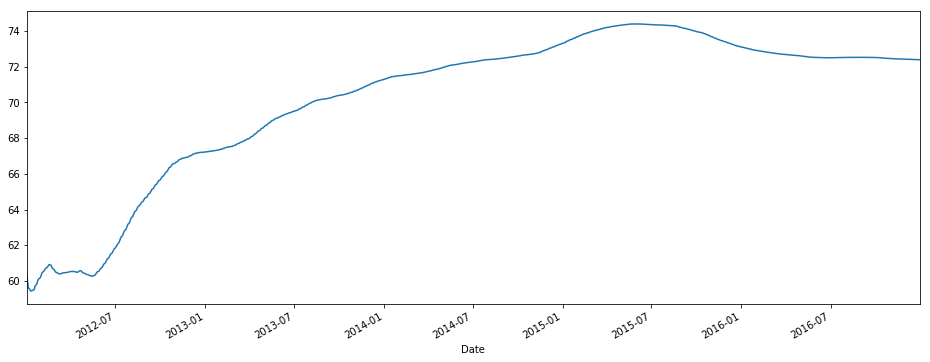

In [47]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))
plt.show()

另外是利用以上講的rolling方法，可以很簡單地做出布林通道如下

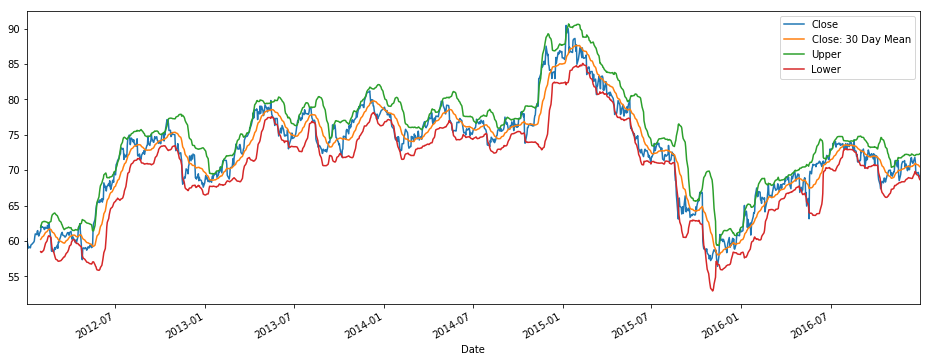

In [51]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['Close'].rolling(window=20).std()
df[['Close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(16,6))
plt.show()

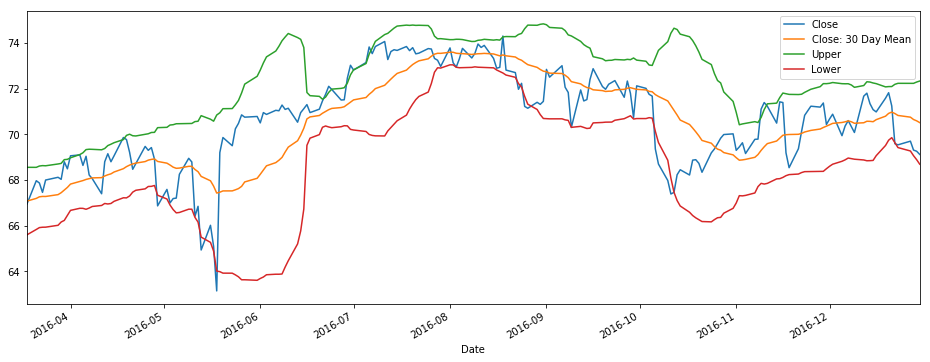

In [50]:
df[['Close','Close: 30 Day Mean','Upper','Lower']].tail(200).plot(figsize=(16,6))
plt.show()